# User Engagement Analysis

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
pio.renderers.default = "svg"

data = pd.read_csv("bounce-rate.csv")
print(data.head())

      Client ID  Sessions Avg. Session Duration Bounce Rate
0  5.778476e+08       367              00:01:35      87.19%
1  1.583822e+09       260              00:01:04      29.62%
2  1.030699e+09       237              00:00:02      99.16%
3  1.025030e+09       226              00:02:22      25.66%
4  1.469968e+09       216              00:01:23      46.76%


### look at the null values:

In [2]:
print(data.isnull().sum())

Client ID                0
Sessions                 0
Avg. Session Duration    0
Bounce Rate              0
dtype: int64


### column insights:

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              999 non-null    float64
 1   Sessions               999 non-null    int64  
 2   Avg. Session Duration  999 non-null    object 
 3   Bounce Rate            999 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB
None


### prepare our data:

In [4]:
data['Avg. Session Duration'] = data['Avg. Session Duration'].str[1:]
data['Avg. Session Duration'] = pd.to_timedelta(data['Avg. Session Duration'])
data['Avg. Session Duration'] = data['Avg. Session Duration'] / pd.Timedelta(minutes=1)
data['Bounce Rate'] = data['Bounce Rate'].str.rstrip('%').astype('float')
print(data)

        Client ID  Sessions  Avg. Session Duration  Bounce Rate
0    5.778476e+08       367               1.583333        87.19
1    1.583822e+09       260               1.066667        29.62
2    1.030699e+09       237               0.033333        99.16
3    1.025030e+09       226               2.366667        25.66
4    1.469968e+09       216               1.383333        46.76
..            ...       ...                    ...          ...
994  1.049263e+09        17               7.733333        41.18
995  1.145806e+09        17               5.616667        47.06
996  1.153811e+09        17               0.200000        94.12
997  1.182133e+09        17               1.216667        88.24
998  1.184187e+09        17               2.566667        64.71

[999 rows x 4 columns]


### look at the descriptive statistics of the data:

In [5]:
print(data.describe())

          Client ID    Sessions  Avg. Session Duration  Bounce Rate
count  9.990000e+02  999.000000             999.000000   999.000000
mean   1.036401e+09   32.259259               3.636520    65.307978
std    6.151503e+08   24.658588               4.040562    22.997270
min    1.849182e+05   17.000000               0.000000     4.880000
25%    4.801824e+08   21.000000               0.891667    47.370000
50%    1.029507e+09   25.000000               2.466667    66.670000
75%    1.587982e+09   35.000000               4.816667    85.190000
max    2.063338e+09  367.000000              30.666667   100.000000


### correlation matrix:

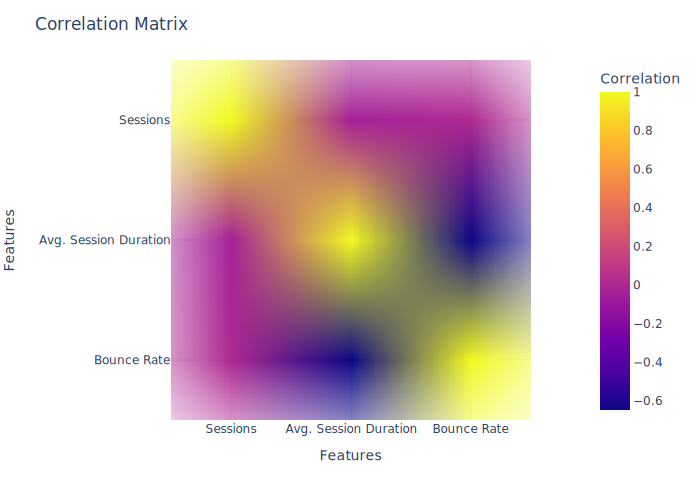

In [6]:
# Exclude 'Client Id' column from the dataset
data_without_id = data.drop('Client ID', axis=1)

# Calculate the correlation matrix
correlation_matrix = data_without_id.corr()

# Visualize the correlation matrix
correlation_fig = px.imshow(correlation_matrix, 
                            labels=dict(x='Features', 
                                        y='Features', 
                                        color='Correlation'))
correlation_fig.update_layout(title='Correlation Matrix')
correlation_fig.show()

### Analyzing Bounce Rates:

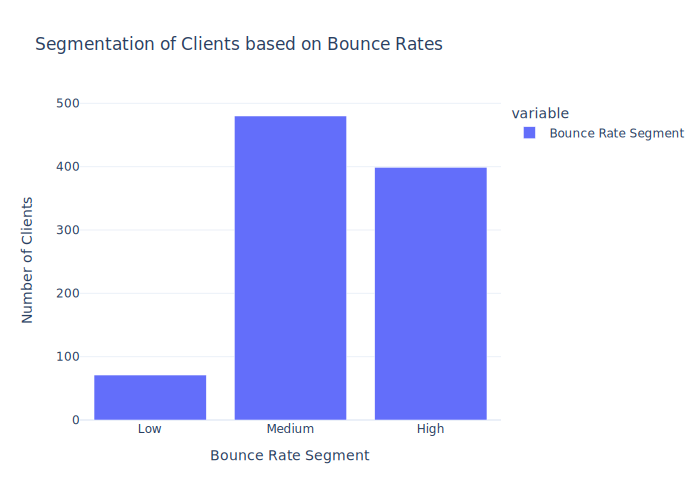

In [7]:
# Define the thresholds for high, medium, and low bounce rates
high_bounce_rate_threshold = 70
low_bounce_rate_threshold = 30

# Segment the clients based on bounce rates
data['Bounce Rate Segment'] = pd.cut(data['Bounce Rate'], 
                                     bins=[0, low_bounce_rate_threshold, 
                                           high_bounce_rate_threshold, 100],
                                   labels=['Low', 'Medium', 'High'], right=False)

# Count the number of clients in each segment
segment_counts = data['Bounce Rate Segment'].value_counts().sort_index()

# Visualize the segments
segment_fig = px.bar(segment_counts, labels={'index': 'Bounce Rate Segment', 
                                             'value': 'Number of Clients'},
                     title='Segmentation of Clients based on Bounce Rates')
segment_fig.show()

### average session duration of the users in each bounce rate segment:

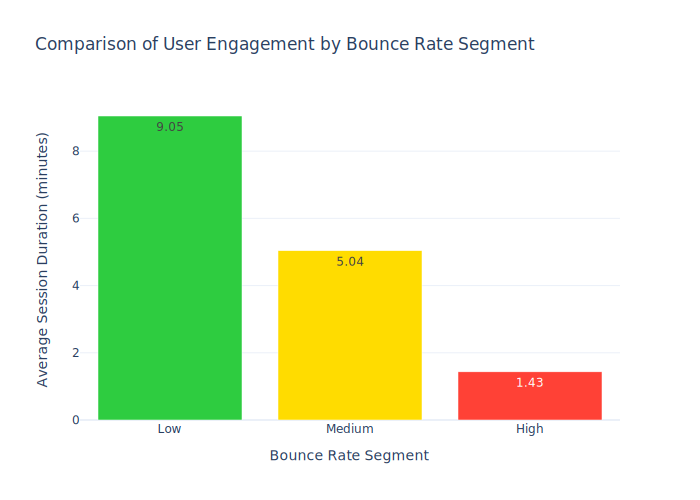

In [8]:
# Calculate the average session duration for each segment
segment_avg_duration = data.groupby('Bounce Rate Segment')['Avg. Session Duration'].mean()

# Create a bar chart to compare user engagement
engagement_fig = go.Figure(data=go.Bar(
    x=segment_avg_duration.index,
    y=segment_avg_duration,
    text=segment_avg_duration.round(2),
    textposition='auto',
    marker=dict(color=['#2ECC40', '#FFDC00', '#FF4136'])
))

engagement_fig.update_layout(
    title='Comparison of User Engagement by Bounce Rate Segment',
    xaxis=dict(title='Bounce Rate Segment'),
    yaxis=dict(title='Average Session Duration (minutes)'),
)

engagement_fig.show()

###  top 10 loyal users according to the number of sessions and average session duration:

In [9]:
# Calculate the total session duration for each client
data['Total Session Duration'] = data['Sessions'] * data['Avg. Session Duration']

# Sort the DataFrame by the total session duration in descending order
df_sorted = data.sort_values('Total Session Duration', ascending=False)

# the top 10 most loyal users
df_sorted.head(10)

,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Bounce Rate Segment,Total Session Duration
20,1.884620e+09,93,30.666667,16.13,Low,2852.000000
54,1.041722e+09,67,20.500000,22.39,Low,1373.500000
262,8.756557e+08,34,29.966667,26.47,Low,1018.866667
10,1.461865e+09,117,8.450000,48.72,Medium,988.650000
173,1.849182e+05,40,24.416667,17.50,Low,976.666667
15,1.049234e+09,99,9.716667,34.34,Medium,961.950000
310,2.026953e+09,31,22.116667,35.48,Medium,685.616667
24,1.903206e+09,90,7.016667,36.67,Medium,631.500000
211,2.054569e+09,37,16.250000,35.14,Medium,601.250000
402,6.220935e+08,28,21.300000,39.29,Medium,596.400000


### relationship between the average session duration and the bounce rates:

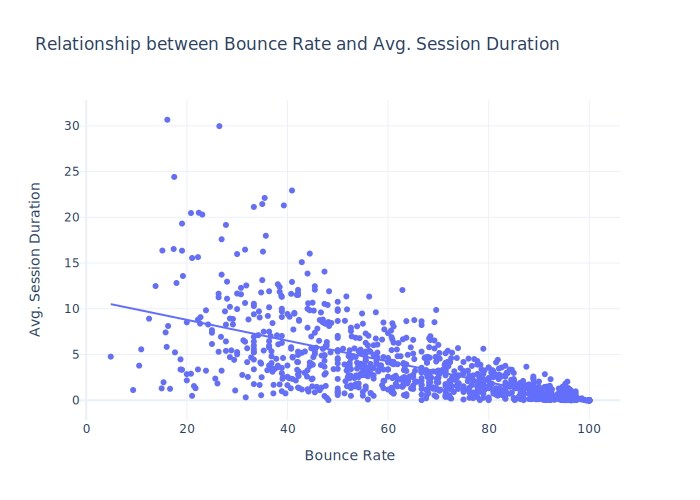

In [10]:
# Create a scatter plot to analyze the relationship between bounce rate and avg session duration
scatter_fig = px.scatter(data, x='Bounce Rate', y='Avg. Session Duration',
                         title='Relationship between Bounce Rate and Avg. Session Duration', trendline='ols')

scatter_fig.update_layout(
    xaxis=dict(title='Bounce Rate'),
    yaxis=dict(title='Avg. Session Duration')
)

scatter_fig.show()

### Analyzing User Retention:

In [11]:
# Define the retention segments based on number of sessions
def get_retention_segment(row):
    if row['Sessions'] >= 32: # 32 is mean of sessions
        return 'Frequent Users'
    else:
        return 'Occasional Users'

# Create a new column for retention segments
data['Retention Segment'] = data.apply(get_retention_segment, axis=1)

# Print the updated DataFrame
print(data)

        Client ID  Sessions  Avg. Session Duration  Bounce Rate  \
0    5.778476e+08       367               1.583333        87.19   
1    1.583822e+09       260               1.066667        29.62   
2    1.030699e+09       237               0.033333        99.16   
3    1.025030e+09       226               2.366667        25.66   
4    1.469968e+09       216               1.383333        46.76   
..            ...       ...                    ...          ...   
994  1.049263e+09        17               7.733333        41.18   
995  1.145806e+09        17               5.616667        47.06   
996  1.153811e+09        17               0.200000        94.12   
997  1.182133e+09        17               1.216667        88.24   
998  1.184187e+09        17               2.566667        64.71   

    Bounce Rate Segment  Total Session Duration Retention Segment  
0                  High              581.083333    Frequent Users  
1                   Low              277.333333    Frequent

### average bounce rate by retention segment:

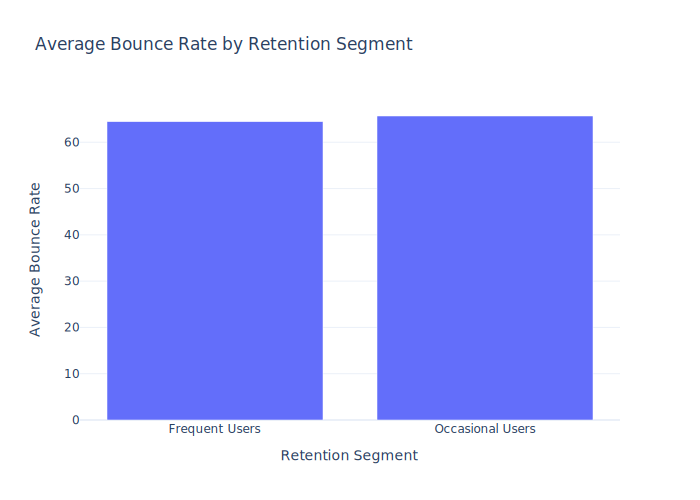

In [12]:
# Calculate the average bounce rate for each retention segment
segment_bounce_rates = data.groupby('Retention Segment')['Bounce Rate'].mean().reset_index()

# Create a bar chart to visualize the average bounce rates by retention segment
bar_fig = px.bar(segment_bounce_rates, x='Retention Segment', y='Bounce Rate',
                 title='Average Bounce Rate by Retention Segment',
                 labels={'Retention Segment': 'Retention Segment', 'Bounce Rate': 'Average Bounce Rate'})

bar_fig.show()

### percentage of retained users:

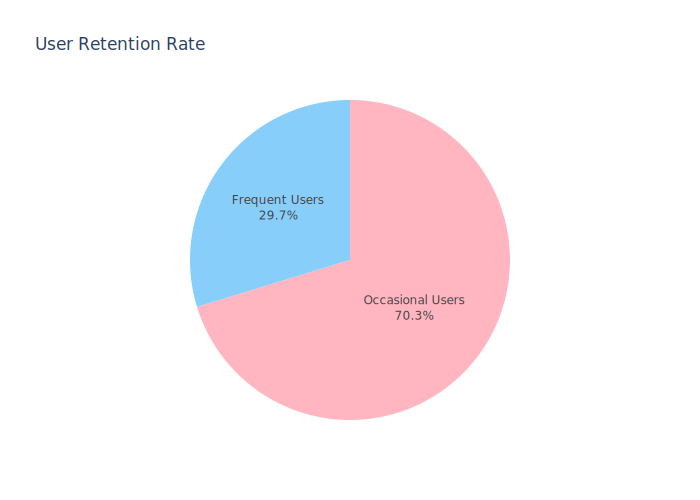

In [13]:
# Count the number of users in each retention segment
segment_counts = data['Retention Segment'].value_counts()

# Define the pastel colors
colors = ['#FFB6C1', '#87CEFA']

# Create a pie chart using Plotly
fig = px.pie(segment_counts, 
             values=segment_counts.values, 
             names=segment_counts.index, 
             color=segment_counts.index, 
             color_discrete_sequence=colors,
             title='User Retention Rate')

# Update layout and show the chart
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

### In the data of 1000 users, the platform retained 29.7% of users (297 users) who frequently visit the platform.